<a href="https://colab.research.google.com/github/saetta80/GenerativeAI/blob/main/GA_NLP_LVC_2_Text_Preprocessing_Working_with_Text_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

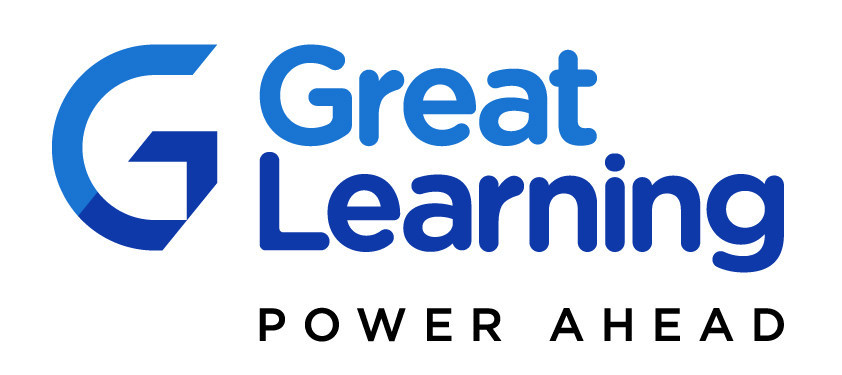

# **LVC 2: Text Preprocessing - Working with Text Data**

# **Twitter Sentiment Analyzer**

This notebook is meant to give a quick demonstration of a typical NLP solution - a **Twitter Sentiment Analyzer**.

We will be analyzing a popular text dataset often used to demonstrate this - the tweets database of Donald Trump, the former US president, known for the range and volatility of the tweets he posted when active on Twitter. While the main purpose of this as an accompaniment to the LVC is just as a demonstration, we see that **this Machine Learning workflow achieves a decent level of success at the core prediction task** involved in Sentiment Analysis as well.


## **Learning Objectives of this Notebook**

**1.** **Loading, understanding and performing EDA** on the Trump Tweets dataset

**2.** **Performing Text Preprocessing** on the dataset

**3.** **Vectorizing** the text using the Bag of Words (BoW) and TF-IDF approach before feeding to the Machine Learning model

**4.** **Performing Machine Learning**, predicting the sentiment of each tweet and evaluating the performance of the model

## **Importing the necessary libraries**

In [1]:
# Import necessary libraries
import pandas as pd                      # Import Pandas for data manipulation
import string                            # Import String for string operations
import re                                # Import re for regular expressions
from nltk.corpus import stopwords        # Import NLTK's stopwords
from nltk.tokenize import word_tokenize  # Import NLTK's word_tokenize
from nltk.stem import WordNetLemmatizer  # Import NLTK's WordNetLemmatizer
import nltk                              # Import NLTK library
nltk.download('punkt')                   # Download NLTK's 'punkt' dataset
nltk.download('stopwords')               # Download NLTK's 'stopwords' dataset
nltk.download('wordnet')                 # Download NLTK's 'wordnet' dataset

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## **Loading the dataset**

#### **Data Set Information & Context**

This dataset contains tweets from Donald Trump from between 2009 and 2020.


The data has features such as Content, Date, Number of Retweets, No. of Favorites, and the column of the tweets.


It has also got the pre-labeled sentiment (Positive and Negative) column for each tweet.

We will be exploring and analyzing the relevant columns from this data.

We will be applying all the necessary text pre-processing steps on the content column of the tweet data.

#### **Data Content**

- **id**: Unique tweet id
- **link**: Link to tweet
- **content**: Text of tweet
- **date**: Date of the tweet
- **retweets**: Number of retweets
- **favorites**: Number of favorites
- **mentions**: Accounts mentioned in the tweet
- **Sentiment**: Sentiment of each tweet in the content column


In [7]:
data = pd.read_csv("/content/trump_tweets.csv")

In [8]:
data.head()

,Unnamed: 0,id,link,content,date,retweets,favorites,mentions,hashtags,geo,Sentiment
0,0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN,positive
1,1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN,positive
2,2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN,positive
3,3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN,positive
4,4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN,positive


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41122 entries, 0 to 41121
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  41122 non-null  int64  
 1   id          41122 non-null  int64  
 2   link        41122 non-null  object 
 3   content     41122 non-null  object 
 4   date        41122 non-null  object 
 5   retweets    41122 non-null  int64  
 6   favorites   41122 non-null  int64  
 7   mentions    22467 non-null  object 
 8   hashtags    5810 non-null   object 
 9   geo         0 non-null      float64
 10  Sentiment   41122 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 3.5+ MB


- **Number of Rows**: The DataFrame contains 41,122 rows of data, as indicated by the "non-null" counts in each column.

- **Column Data Types**: The DataFrame has columns with different data types:

    - Four columns have integer data type (int64).
One column has floating-point data type (float64).
    - Six columns have object data type, typically representing strings or mixed data.


- **Missing Values**: The "mentions" column has 22,467 non-null values, which means it contains missing values (NaN) for some rows. Similarly, the "hashtags" column has 5,810 non-null values, indicating missing values in that column as well.


## **Using the Content and Sentiment columns for Processing and Model Building**

In [10]:
data = data[['content', 'Sentiment']]

In [11]:
data.head(10)

,content,Sentiment
0,Be sure to tune in and watch Donald Trump on L...,positive
1,Donald Trump will be appearing on The View tom...,positive
2,Donald Trump reads Top Ten Financial Tips on L...,positive
3,New Blog Post: Celebrity Apprentice Finale and...,positive
4,"""My persona will never be that of a wallflower...",positive
5,"Miss USA Tara Conner will not be fired - ""I've...",positive
6,Listen to an interview with Donald Trump discu...,positive
7,"""Strive for wholeness and keep your sense of w...",positive
8,"Enter the ""Think Like A Champion"" signed book ...",positive
9,"""When the achiever achieves, it's not a platea...",positive


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41122 entries, 0 to 41121
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    41122 non-null  object
 1   Sentiment  41122 non-null  object
dtypes: object(2)
memory usage: 642.7+ KB


## **Exploratory Data Analysis**

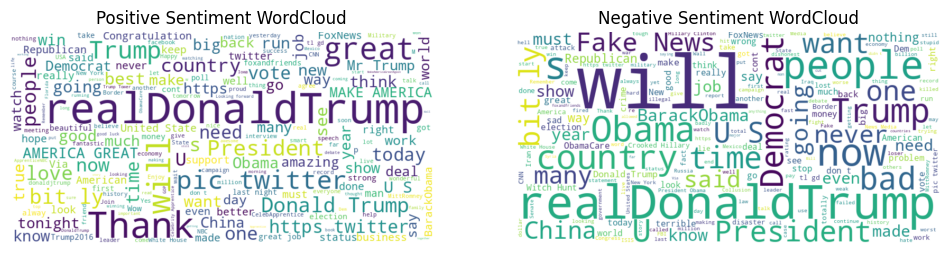

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate the content for positive and negative sentiments
positive_content = data[data['Sentiment'] == 'positive']['content']
negative_content = data[data['Sentiment'] == 'negative']['content']

# Create a WordCloud for positive sentiments
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_content))

# Create a WordCloud for negative sentiments
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_content))

# Plot the WordClouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment WordCloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment WordCloud')
plt.axis('off')

plt.show()

Text(0.5, 1.0, 'Distribution of Sentiments in Tweets')

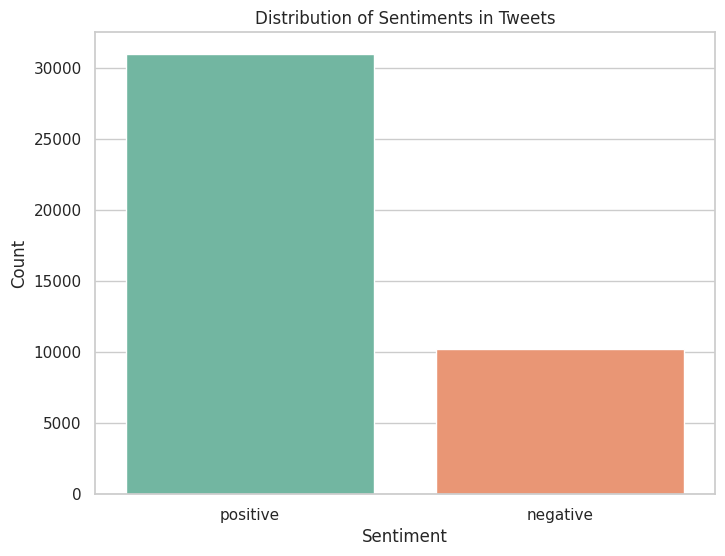

In [15]:
import seaborn as sns
sns.set(style="whitegrid")

# Create a countplot for the 'Sentiment' column
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Sentiment', palette='Set2')

# Add labels and a title to the plot
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments in Tweets')

In [16]:
data['Sentiment'].value_counts()

positive    30940
negative    10182
Name: Sentiment, dtype: int64

- **Positive Sentiment:** There are 30,940 tweets classified as having a positive sentiment. This indicates that a significant portion of the dataset contains tweets expressing positive opinions or emotions.

- **Negative Sentiment:** In contrast, there are 10,182 tweets classified as having a negative sentiment. While the number of negative sentiment tweets is notably smaller than the positive ones, it still represents a substantial portion of the dataset.

## **Text Preprocessing**

Text Preprocessing is an **essential step in NLP and Text Analysis tasks.**

The following code performs a few key preprocessing steps before proceeding with the code.

In [17]:
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
# Function for text preprocessing
def preprocess_text(text):
    # 1. Lowercasing
    text = text.lower()

    # 2. Removing Punctuation
    text = ''.join([char for char in text if char not in string.punctuation])

    # 3. Removing Special Characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 4. Tokenization
    tokens = word_tokenize(text)

    # 5. Stopword Removal
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # 6. Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # 7. Removing Numbers
    tokens = [token for token in tokens if not token.isdigit()]

    # 8. Removing Short Words (e.g., words with less than 3 characters)
    tokens = [token for token in tokens if len(token) > 2]

    # 9. Join Tokens Back to Text
    text = ' '.join(tokens)

    return text

# Apply preprocessing to the 'content' column
data['content'] = data['content'].apply(preprocess_text)

# Now 'data['content']' contains preprocessed text data


In [19]:
data['content']

0        sure tune watch donald trump late night david ...
1        donald trump appearing view tomorrow morning d...
2        donald trump read top ten financial tip late s...
3        new blog post celebrity apprentice finale less...
4        persona never wallflower rather build wall cli...
                               ...                        
41117    never seen republican party strong unified rig...
41118    mini mike bloomberg critical jack wilson saved...
41119    thrilled back great state texas tonight people...
41120    house president got due process terrorist got ...
41121    great show check tonight foxnewshttpstwitterco...
Name: content, Length: 41122, dtype: object

In [20]:
# Define a mapping dictionary
sentiment_mapping = {'positive': 0, 'negative': 1}

# Apply the mapping to the 'Sentiment' column
data['Sentiment'] = data['Sentiment'].map(sentiment_mapping)


In [21]:
data.head()

,content,Sentiment
0,sure tune watch donald trump late night david ...,0
1,donald trump appearing view tomorrow morning d...,0
2,donald trump read top ten financial tip late s...,0
3,new blog post celebrity apprentice finale less...,0
4,persona never wallflower rather build wall cli...,0


## **Bag of Words Text Vectorization**

The Bag-of-Words model treats text as a collection of words, disregarding grammar and word order. It represents text by creating a vocabulary of unique words in the dataset and counting the frequency of each word's occurrence in a document. These word frequencies are then used as features for machine learning algorithms.

**Scikit-Learn provides a simple way to create a Bag-of-Words representation of text data using its CountVectorizer class**

**Key Parameters**:

stop_words: You can specify a list of stop words to be excluded from the vocabulary.

max_features: Limit the number of features (words) to consider based on the most frequent ones.

ngram_range: You can consider not only individual words but also word combinations (bigrams, trigrams, etc.) by setting this parameter.

In [22]:
# Importing the CountVectorizer class for bag-of-words representation
from sklearn.feature_extraction.text import CountVectorizer

# Importing train-test split function for dataset splitting
from sklearn.model_selection import train_test_split

# Importing the RandomForestClassifier for building the classification model
from sklearn.ensemble import RandomForestClassifier

# Importing performance metrics - confusion matrix, accuracy, and F1 score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# Importing necessary libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#Create a Bag of Words representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['content'])


## **Random Forest Classifier for Machine Learning**

In [24]:
##Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['Sentiment'], test_size=0.2, random_state=42)


In [25]:
# Create a Random Forest Classifier with 100 decision trees and a fixed random seed for reproducibility
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit (train) the classifier on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
# Make predictions on the test data using the trained Random Forest Classifier
y_pred = rf_classifier.predict(X_test)

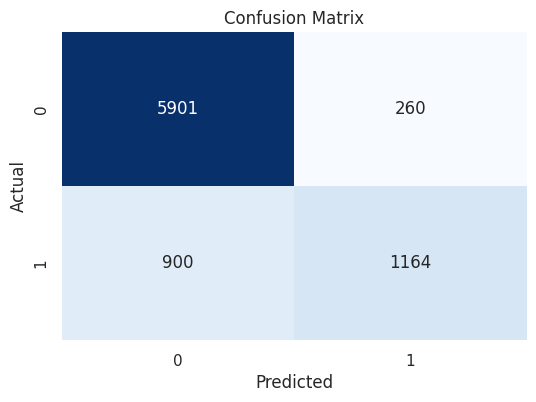

In [27]:
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [28]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.86
F1 Score: 0.67


**Accuracy (0.86):**

Accuracy is a measure of how many of the total predictions made by your model were correct.
An accuracy of 0.86 means that your model correctly classified 86% of the total examples in the dataset.

**F1 Score (0.67):**

The F1 Score is a metric that takes both precision and recall into account and provides a balance between them. It's particularly useful when dealing with imbalanced datasets.
An F1 Score of 0.67 suggests a reasonable balance between precision and recall.

## **TF-IDF Text Vectorization**

TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents (corpus). It is widely used in text mining and natural language processing for various tasks, such as information retrieval, text classification, and document clustering.

- **Term Frequency (TF)**: This component measures how frequently a term (word) appears in a document. It is calculated as the ratio of the number of times a term occurs in a document to the total number of terms in that document. TF emphasizes words that appear often in a document.

**TF = (Number of times term appears in document) / (Total number of terms in document)**

- **Inverse Document Frequency (IDF)**: IDF measures the importance of a term across a collection of documents (corpus). It is calculated as the logarithm of the ratio of the total number of documents to the number of documents containing the term. IDF downweights terms that are common across many documents.

**IDF = log(Total number of documents / Number of documents containing the term)**


**Scikit-Learn provides a simple and effective way to compute TF-IDF scores for text data using the TfidfVectorizer clas**

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [30]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['content'], data['Sentiment'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the number of features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## **Random Forest Classifier for Machine Learning**

In [31]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.86
F1 Score: 0.67


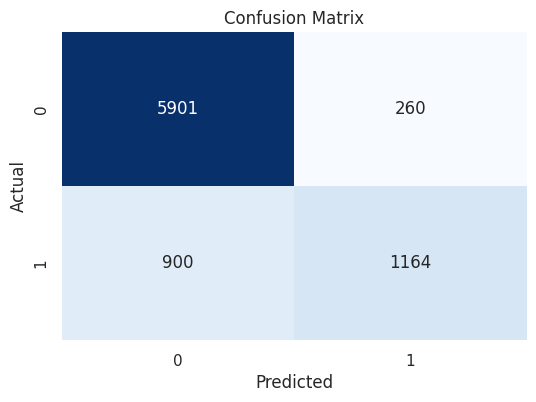

In [33]:
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## **Conclusions and Takeaways**

- As we're seeing above, both the Bag of Words & TF-IDF Text Vectorization techniques, when paired with a Machine Learning model, are **able to get around 67% F1 score** on this imbalanced Text Classification problem on Sentiment Analysis.

- This is quite expected, given the relative naïvety of these techniques. Being count-based / statistical techniques, they have **little-to-no scope of understanding the semantic meaning of the text** in the dataset, which as the industry eventually realized, was critical to performing well on many Natural Language Processing tasks.

- Deep Learning and Neural Networks allowed us to create a better text vectorization scheme - **Word Embeddings**, which **started to get a glimpse of the semantic meaning** contained in text. This definitely enabled an improvement in performance, as we shall observe in the upcoming module.